<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_WState_01_Perplexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-awa5v1kw
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-awa5v1kw
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from math import sqrt

In [71]:
def create_w_state(num_qubits=3):
    iqc = QuantumCircuit(num_qubits)

    # 초기 상태 준비: |100>
    iqc.x(0)

    # 첫 번째 큐비트에 Ry(2θ) 회전 적용 (θ = arccos(1/√3))
    #theta = np.arccos(1/np.sqrt(3))
    theta = 2* np.arccos(np.sqrt(1/3))
    iqc.ry(theta, 0)

    # 제어 Hadamard 및 CNOT 게이트 적용
    iqc.ch(0, 1)
    iqc.cx(1, 2)
    iqc.cx(0, 1)
    iqc.x(0)

    return iqc
###def


In [72]:
# 3-큐빗 W-State 생성
qc = create_w_state(3)
#qc.measure_all()

In [73]:
print("3-큐빗 W-State 회로:")
print(qc.draw())

3-큐빗 W-State 회로:
     ┌───┐┌────────────┐               ┌───┐
q_0: ┤ X ├┤ Ry(1.9106) ├──■─────────■──┤ X ├
     └───┘└────────────┘┌─┴─┐     ┌─┴─┐└───┘
q_1: ───────────────────┤ H ├──■──┤ X ├─────
                        └───┘┌─┴─┐└───┘     
q_2: ────────────────────────┤ X ├──────────
                             └───┘          


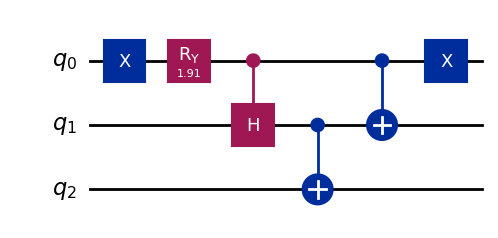

In [74]:
# 회로 시각화
qc.draw('mpl')

In [75]:
backends = Aer.backends()
backends

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

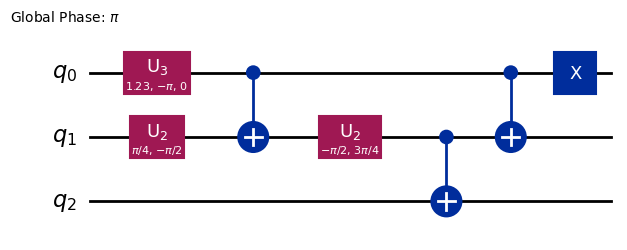

In [76]:
# 시뮬레이션 실행
backend = Aer.get_backend('statevector_simulator')
#backend = Aer.get_backend('qasm_simulator')

qc_transpiled = transpile(qc, backend)

qc_transpiled.draw('mpl')


In [77]:
result = backend.run(qc_transpiled, shots=1024).result()
statevector = result.get_statevector()

In [78]:
# 상태벡터 출력
print("\n상태벡터:")
print(statevector)


상태벡터:
Statevector([ 0.00000000e+00+0.00000000e+00j,
             -8.16496581e-01+2.16529450e-16j,
              4.08248290e-01-2.77555756e-17j,
              0.00000000e+00+0.00000000e+00j,
              4.08248290e-01+2.77555756e-17j,
              0.00000000e+00+0.00000000e+00j,
              0.00000000e+00+0.00000000e+00j,
             -1.41535456e-16+0.00000000e+00j],
            dims=(2, 2, 2))


In [79]:
print(statevector.probabilities_dict())

{'001': 0.6666666666666666, '010': 0.16666666666666663, '100': 0.16666666666666666, '111': 2.0032285187675037e-32}


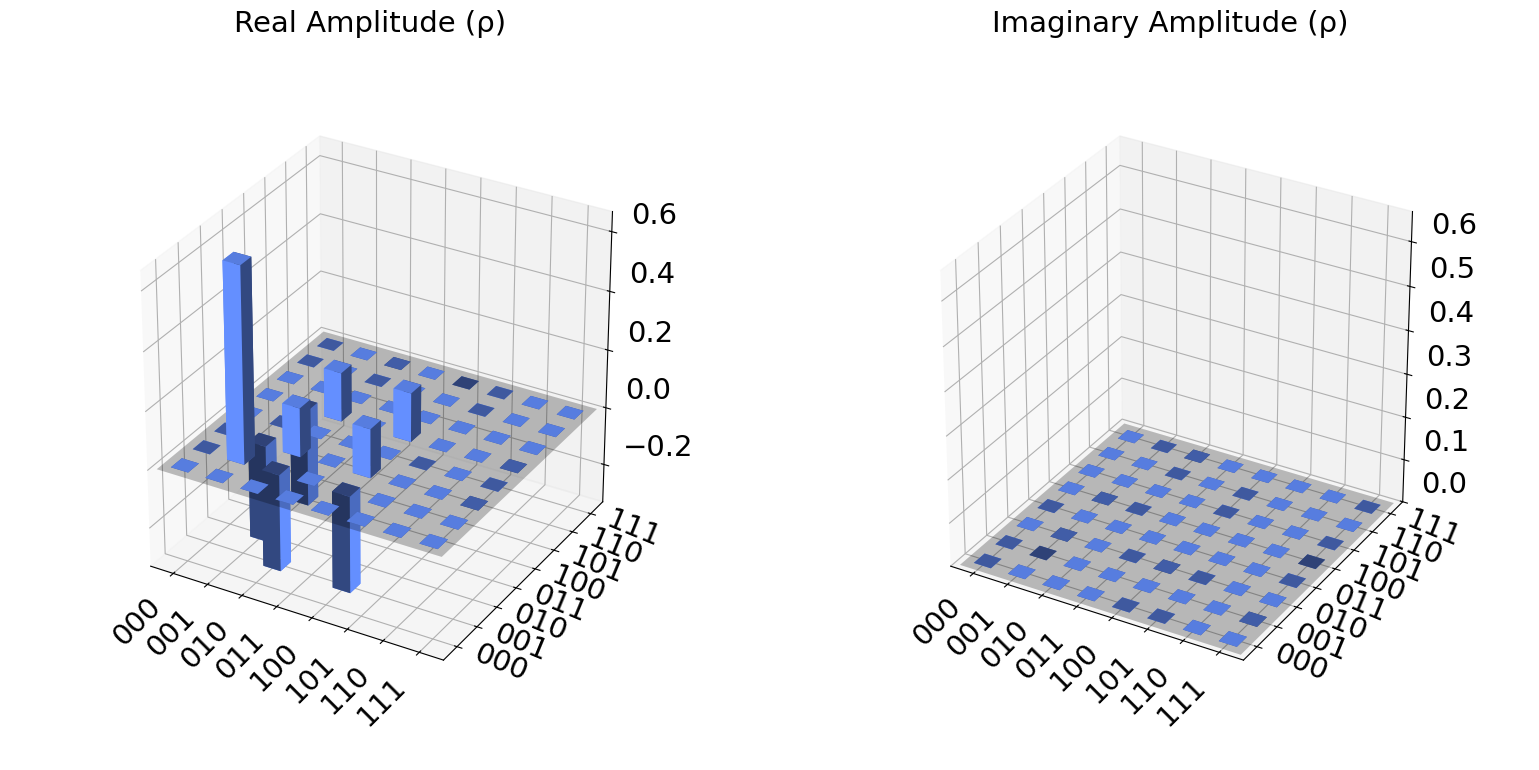

In [80]:
plot_state_city(statevector)

In [81]:
counts = result.get_counts()
print(counts)

{'001': 0.666666666666667, '010': 0.166666666666667, '100': 0.166666666666667}


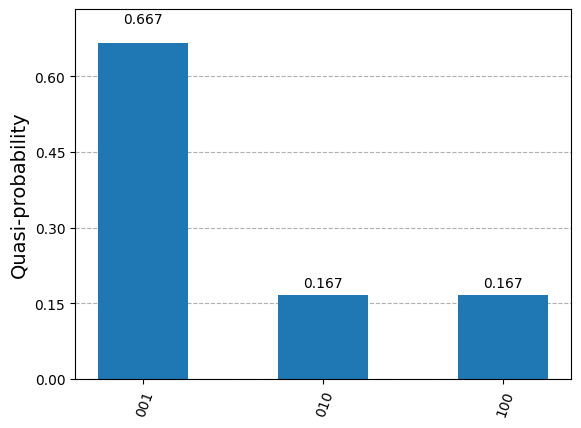

In [82]:
plot_histogram(counts)

In [83]:
# W-State 검증
def verify_w_state(statevector, n_qubits):
    """
    생성된 상태가 W-State인지 검증
    """
    # 이론적 W-State 확률 계산
    theoretical_prob = 1 / n_qubits

    # 각 기저 상태의 확률 계산
    probabilities = {}
    for i in range(2**n_qubits):
        bitstring = format(i, f'0{n_qubits}b')
        prob = abs(statevector[i])**2
        if prob > 1e-10:  # 무시할 수 있는 작은 값 필터링
            probabilities[bitstring] = prob
        ###if
    ###for

    # W-State 기저 상태만 남기기
    w_state_bases = [format(2**i, f'0{n_qubits}b') for i in range(n_qubits)]

    # 검증
    is_w_state = True
    for basis, prob in probabilities.items():
        if basis in w_state_bases:
            if abs(prob - theoretical_prob) > 1e-10:
                is_w_state = False
                break
        else:
            if prob > 1e-10:
                is_w_state = False
                break
            ###if
        ###if
    ###for

    return is_w_state, probabilities
###def

In [84]:
# W-State 검증 실행
is_valid, probs = verify_w_state(statevector, 3)
print("\nW-State 검증 결과:", "유효함" if is_valid else "유효하지 않음")
print("확률 분포:", probs)


W-State 검증 결과: 유효하지 않음
확률 분포: {'001': 0.6666666666666666, '010': 0.16666666666666663, '100': 0.16666666666666666}
